In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
|!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('Goa.csv')
df1=pd.read_csv('weekly_data.csv')

In [ ]:
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
0,January,2010,100,45,303588,62.12
1,February,2010,80,44,274509,59.45
2,March,2010,120,39,254800,61.23
3,April,2010,140,35,239143,63.01
4,May,2010,130,36,225558,64.79


In [ ]:
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
0,2010,January,2010-January-1,34.003869,15.301741,103231.665252,21.123203
1,2010,January,2010-January-2,32.096470,14.443411,97441.029990,19.938327
2,2010,January,2010-January-3,24.288959,10.930031,73738.364294,15.088301
3,2010,January,2010-January-4,9.610703,4.324816,29176.940464,5.970169
4,2010,February,2010-February-1,23.188926,12.753909,79569.609443,17.232270


In [ ]:
df['Month'] = df['Month'].map({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})
df1['Month'] = df1['Month'].map({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})

In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype('str')+'-'+df['Month'].astype('str')+'-'+'01')
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Date
0,1,2010,100,45,303588,62.12,2010-01-01
1,2,2010,80,44,274509,59.45,2010-02-01
2,3,2010,120,39,254800,61.23,2010-03-01
3,4,2010,140,35,239143,63.01,2010-04-01
4,5,2010,130,36,225558,64.79,2010-05-01


In [ ]:
df1['Week'] = df1['Date'].str[-1:]
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Week
0,2010,1,2010-January-1,34.003869,15.301741,103231.665252,21.123203,1
1,2010,1,2010-January-2,32.096470,14.443411,97441.029990,19.938327,2
2,2010,1,2010-January-3,24.288959,10.930031,73738.364294,15.088301,3
3,2010,1,2010-January-4,9.610703,4.324816,29176.940464,5.970169,4
4,2010,2,2010-February-1,23.188926,12.753909,79569.609443,17.232270,1


In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
Month,1.000000e+00,1.195782e-14,0.389627,0.100718,0.005589,0.875517
Year,1.195782e-14,1.000000e+00,0.181351,0.758008,0.506196,0.416609
Hotel_Revenue,3.896269e-01,1.813513e-01,1.000000,0.596231,0.689808,0.436654
Trends,1.007181e-01,7.580079e-01,0.596231,1.000000,0.884031,0.415287
Flight_Traffic,5.588931e-03,5.061960e-01,0.689808,0.884031,1.000000,0.225063
Crime_Rate,8.755169e-01,4.166089e-01,0.436654,0.415287,0.225063,1.000000


In [ ]:
df1.corr()

<ipython-input-11-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Year,Month,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate
Year,1.000000e+00,-6.317438e-15,0.124383,0.442137,0.385176,0.097052
Month,-6.317438e-15,1.000000e+00,0.267233,0.058748,0.004253,0.203959
Hotel_Revenue,1.243833e-01,2.672333e-01,1.000000,0.809122,0.812584,0.740713
Trends,4.421370e-01,5.874769e-02,0.809122,1.000000,0.904496,0.824257
Flight_Traffic,3.851763e-01,4.252748e-03,0.812584,0.904496,1.000000,0.613732
Crime_Rate,9.705242e-02,2.039587e-01,0.740713,0.824257,0.613732,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on your data
scaler.fit(df[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

# Transform the data
df[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']] = scaler.transform(df[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

In [ ]:
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Date
0,1,2010,0.223188,0.153846,0.341006,0.098162,2010-01-01
1,2,2010,0.165217,0.138462,0.307866,0.000000,2010-02-01
2,3,2010,0.281159,0.061538,0.285406,0.065441,2010-03-01
3,4,2010,0.339130,0.000000,0.267562,0.130882,2010-04-01
4,5,2010,0.310145,0.015385,0.252081,0.196324,2010-05-01


In [ ]:
scaler1 = MinMaxScaler()

# Fit the scaler on your data
scaler1.fit(df1[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

# Transform the data
df1[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']] = scaler.transform(df1[['Hotel_Revenue','Trends','Flight_Traffic', 'Crime_Rate']])

In [ ]:
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Week
0,2010,1,2010-January-1,0.031895,-0.303050,0.112674,-1.409073,1
1,2010,1,2010-January-2,0.026367,-0.316255,0.106075,-1.452635,2
2,2010,1,2010-January-3,0.003736,-0.370307,0.079063,-1.630945,3
3,2010,1,2010-January-4,-0.038810,-0.471926,0.028280,-1.966170,4
4,2010,2,2010-February-1,0.000548,-0.342248,0.085709,-1.552122,1


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_results=adfuller(df['Flight_Traffic'])

In [ ]:
def adfuller_test(sales):
  results=adfuller(df['Flight_Traffic'])
  labels=['ADF Test Statistics','p-value','Lags Used','Number of Observations Used']
  for value,label in zip(results,labels):
    print(label + ' : ' + str(value))
  if results[1]<=0.11:
      print("H0-Seasonal")
  else:
      print("H1-Not Seasonal")

In [ ]:
adfuller_test(df['Flight_Traffic'])

ADF Test Statistics : -2.553221285397975
p-value : 0.10305593893832743
Lags Used : 14
Number of Observations Used : 141
H0-Seasonal


# Seasonal First Order Difference

In [ ]:
df['Seasonal First Order Difference']=df['Flight_Traffic']-df['Flight_Traffic'].shift(12)

<Axes: >

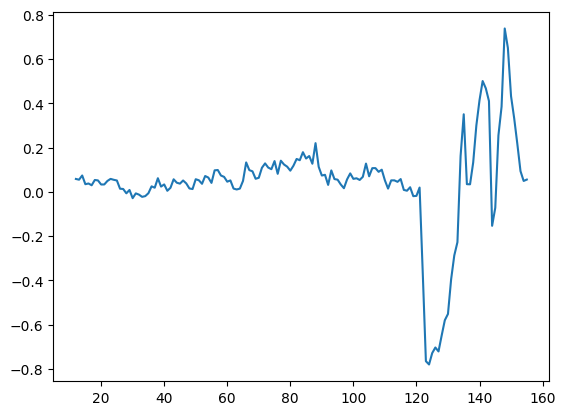

In [ ]:
df['Seasonal First Order Difference'].plot()

In [ ]:
df.head()

,Month,Year,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Date,Seasonal First Order Difference
0,1,2010,0.223188,0.153846,0.341006,0.098162,2010-01-01,NaN
1,2,2010,0.165217,0.138462,0.307866,0.000000,2010-02-01,NaN
2,3,2010,0.281159,0.061538,0.285406,0.065441,2010-03-01,NaN
3,4,2010,0.339130,0.000000,0.267562,0.130882,2010-04-01,NaN
4,5,2010,0.310145,0.015385,0.252081,0.196324,2010-05-01,NaN


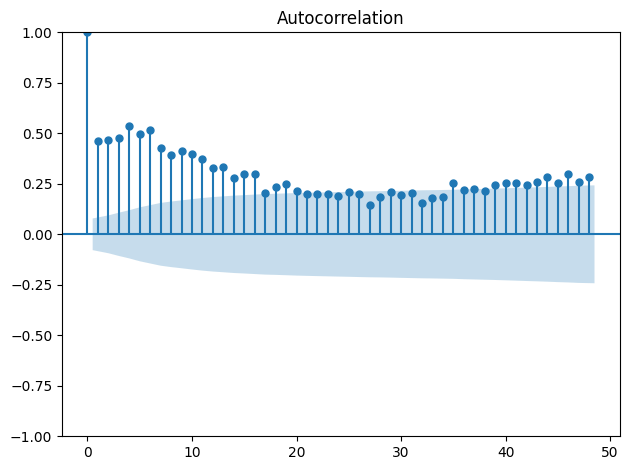

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

data = df1['Flight_Traffic']
plot_acf(data,lags=48)
plt.tight_layout()
plt.show()

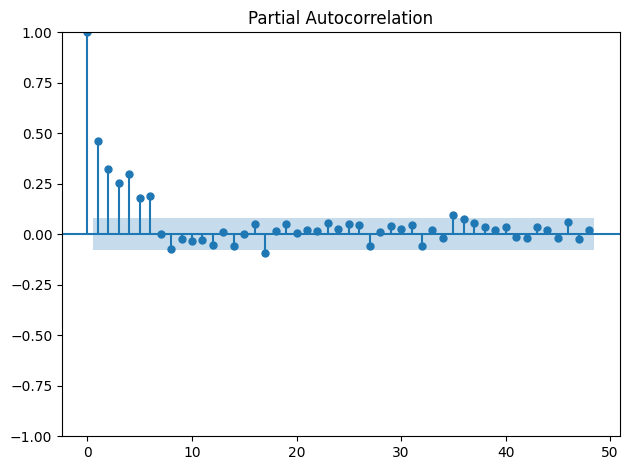

In [ ]:
data = df1['Flight_Traffic']
plot_pacf(data,lags=48)
plt.tight_layout()
plt.show()

In [ ]:
df1['Prev1'] = df1['Flight_Traffic'].shift(1)
df1['Prev4'] = df1['Flight_Traffic'].shift(4)

In [ ]:
df1.head()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Crime_Rate,Week,Prev1,Prev4
0,2010,1,2010-January-1,0.031895,-0.303050,0.112674,-1.409073,1,NaN,NaN
1,2010,1,2010-January-2,0.026367,-0.316255,0.106075,-1.452635,2,0.112674,NaN
2,2010,1,2010-January-3,0.003736,-0.370307,0.079063,-1.630945,3,0.106075,NaN
3,2010,1,2010-January-4,-0.038810,-0.471926,0.028280,-1.966170,4,0.079063,NaN
4,2010,2,2010-February-1,0.000548,-0.342248,0.085709,-1.552122,1,0.028280,0.112674


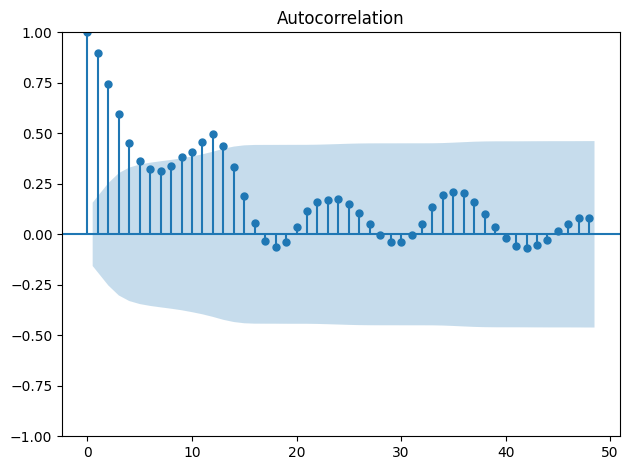

In [ ]:
data = df['Flight_Traffic']
plot_acf(data,lags=48)
plt.tight_layout()
plt.show()

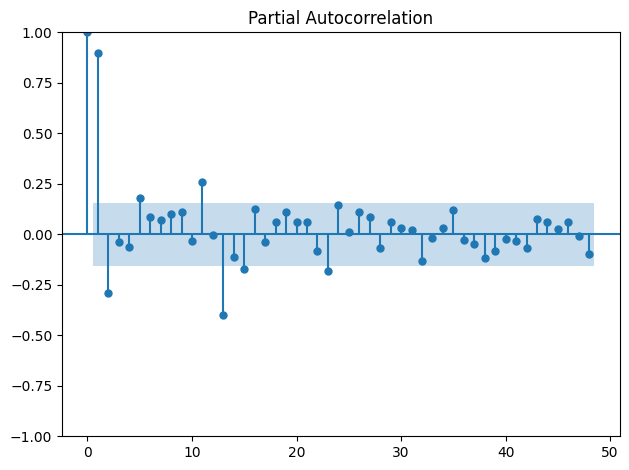

In [ ]:
data = df['Flight_Traffic']
plot_pacf(data,lags=48)
plt.tight_layout()
plt.show()

In [ ]:
df['Prev1'] = df['Flight_Traffic'].shift(1)
df['Prev12'] = df['Flight_Traffic'].shift(12)

In [ ]:
df1.drop(columns = ['Crime_Rate'],inplace = True)

In [ ]:
df1.tail()

,Year,Month,Date,Hotel_Revenue,Trends,Flight_Traffic,Week,Prev1,Prev4
619,2022,11,2022-November-4,0.147073,-0.099472,0.272313,4,0.176718,0.366163
620,2022,12,2022-December-1,0.015150,-0.413068,0.081251,1,0.272313,0.104067
621,2022,12,2022-December-2,0.058524,-0.346592,0.126961,2,0.081251,0.291880
622,2022,12,2022-December-3,0.295818,0.017088,0.377031,3,0.126961,0.176718
623,2022,12,2022-December-4,0.317465,0.050265,0.399844,4,0.377031,0.272313


In [ ]:
X = df1[['Year','Month','Hotel_Revenue','Trends','Week','Prev1','Prev4']]
y = df1['Flight_Traffic']

In [ ]:
X_train = X.iloc[:-48]
y_train = y.iloc[:-48]
X_test = X.iloc[-48:]
y_test = y.iloc[-48:]

In [ ]:
from catboost import CatBoostRegressor

# Create and train a CatBoost classifier
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)



0:	learn: 0.0708198	total: 48.2ms	remaining: 4.77s
1:	learn: 0.0660305	total: 53.9ms	remaining: 2.64s
2:	learn: 0.0611030	total: 55.2ms	remaining: 1.78s
3:	learn: 0.0572370	total: 56.4ms	remaining: 1.35s
4:	learn: 0.0534061	total: 57.6ms	remaining: 1.09s
5:	learn: 0.0496739	total: 64.4ms	remaining: 1.01s
6:	learn: 0.0467132	total: 65.7ms	remaining: 873ms
7:	learn: 0.0439350	total: 67.6ms	remaining: 777ms
8:	learn: 0.0410333	total: 68.8ms	remaining: 696ms
9:	learn: 0.0385930	total: 70ms	remaining: 630ms
10:	learn: 0.0365588	total: 71.5ms	remaining: 578ms
11:	learn: 0.0346164	total: 72.8ms	remaining: 534ms
12:	learn: 0.0328858	total: 74.4ms	remaining: 498ms
13:	learn: 0.0314137	total: 76.5ms	remaining: 470ms
14:	learn: 0.0298358	total: 77.9ms	remaining: 441ms
15:	learn: 0.0283617	total: 79.3ms	remaining: 416ms
16:	learn: 0.0269718	total: 91.5ms	remaining: 447ms
17:	learn: 0.0256597	total: 95.3ms	remaining: 434ms
18:	learn: 0.0245045	total: 101ms	remaining: 429ms
19:	learn: 0.0234433	tota

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

NameError: ignored

In [ ]:
print(np.sqrt(mse))

0.03192468795017134


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print(np.sqrt(mean_squared_error(predictions,y_test)),r2_score(predictions,y_test))

0.038939390830574225 0.774323026700101


In [ ]:
print(r2_score(y_pred,y_test))

0.8791996171183883


In [ ]:
import xgboost as xgb

In [ ]:
df1['Week'] = df1['Week'].astype('int')

In [ ]:
df1['Week'].dtype

dtype('int64')

In [ ]:
data = pd.DataFrame(y_test, y_pred)

In [ ]:
y_test

576    0.149047
577    0.079475
578    0.116103
579    0.153158
580    0.186473
581    0.046717
582    0.170207
583    0.175799
584    0.278406
585    0.127909
586    0.316826
587    0.193076
588    0.193112
589    0.184062
590    0.104780
591    0.240087
592    0.139242
593    0.198545
594    0.216959
595    0.203375
596    0.245551
597    0.082603
598    0.159377
599    0.201608
600    0.166849
601    0.114259
602    0.222658
603    0.067612
604    0.092569
605    0.208159
606    0.072230
607    0.279120
608    0.070042
609    0.251595
610    0.123032
611    0.253941
612    0.161793
613    0.105994
614    0.135662
615    0.366163
616    0.104067
617    0.291880
618    0.176718
619    0.272313
620    0.081251
621    0.126961
622    0.377031
623    0.399844
Name: Flight_Traffic, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
X_train# For regression

,Year,Month,Hotel_Revenue,Trends,Week,Prev1,Prev4
0,2010,1,0.031895,-0.303050,1,NaN,NaN
1,2010,1,0.026367,-0.316255,2,0.112674,NaN
2,2010,1,0.003736,-0.370307,3,0.106075,NaN
3,2010,1,-0.038810,-0.471926,4,0.079063,NaN
4,2010,2,0.000548,-0.342248,1,0.028280,0.112674
...,...,...,...,...,...,...,...
571,2021,11,0.062035,-0.240595,4,0.167653,0.143038
572,2021,12,0.040558,-0.274119,1,0.205570,0.194543
573,2021,12,0.094296,-0.141637,2,0.186959,0.227921
574,2021,12,0.037542,-0.281554,3,0.283150,0.167653


In [ ]:
X_train = X_train.dropna()

In [ ]:
X_train

,Year,Month,Hotel_Revenue,Trends,Week,Prev1,Prev4
4,2010,2,0.000548,-0.342248,1,0.028280,0.112674
5,2010,2,-0.005660,-0.360368,2,0.085709,0.106075
6,2010,2,-0.024162,-0.414381,3,0.077334,0.079063
7,2010,2,-0.005509,-0.359927,4,0.052372,0.028280
8,2010,3,-0.035318,-0.484385,1,0.077538,0.085709
...,...,...,...,...,...,...,...
571,2021,11,0.062035,-0.240595,4,0.167653,0.143038
572,2021,12,0.040558,-0.274119,1,0.205570,0.194543
573,2021,12,0.094296,-0.141637,2,0.186959,0.227921
574,2021,12,0.037542,-0.281554,3,0.283150,0.167653


In [ ]:
X_train.shape, y_train.shape

((572, 7), (576,))

In [ ]:
y_train = y_train[:-4]

In [ ]:
reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(np.sqrt(mse))

0.10248022275398949


In [ ]:
print(r2_score(y_test,y_pred))

-0.4967519192557708
